In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_x= pd.read_csv("Linear_X_Train.csv")
df_y= pd.read_csv("Linear_Y_Train.csv")

In [3]:
df_x.head(5)

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [4]:
df_y.head(5)

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


[-0.28930742 -0.58880963  1.02750749 ... -0.30516366  1.67583291
 -0.49175724]
[-9.11011171e-02 -5.34677208e+01  7.54570088e+01 ... -3.49832749e+01
  1.45206092e+02 -1.71244939e+01]


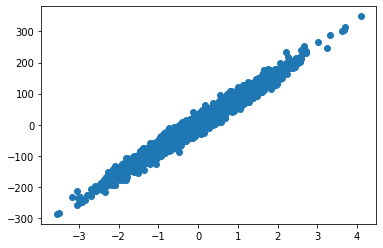

In [5]:
x = df_x.values
y = df_y.values
x = x.reshape((-1,))
y = y.reshape((-1,))
print(x)
print(y)
plt.scatter(x,y)
plt.show()

In [6]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def error(x,y,theta):
    m = x.shape[0]
    error = 0
    for i in range(m):
        hx = hypothesis(x[i],theta)
        error += (hx-y[i])**2
    return error

def gradient(x,y,theta):
    grad = np.zeros((2,))
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i],theta)
        grad[0] +=  (hx-y[i])
        grad[1] += (hx-y[i])*x[i]
    return grad

def gradientDescent(x,y,learning_rate=0.0001):
    theta = np.array([-300.0,0.0])
    itr = 0
    max_itr = 500
    error_list = []
    theta_list = []
    while(itr<=max_itr):
        grad = gradient(x,y,theta)
        e = error(x,y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        itr += 1
    return theta,error_list,theta_list

In [7]:
final_theta, error_list, theta_list = gradientDescent(x,y)

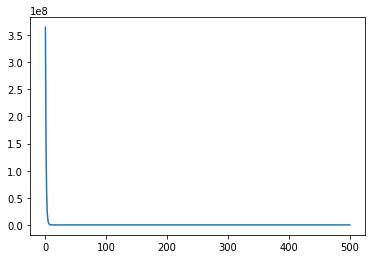

In [8]:
plt.plot(error_list)
plt.show()

In [9]:
print(final_theta)

[ 3.72798828 80.54363185]


In [10]:
X = pd.read_csv("Linear_X_Test.csv")
X = X.values
test = X.reshape((-1,))
print(test)

[-1.87794441 -0.86903192 -2.53018242 ...  0.12800782 -0.27803759
 -0.68042543]


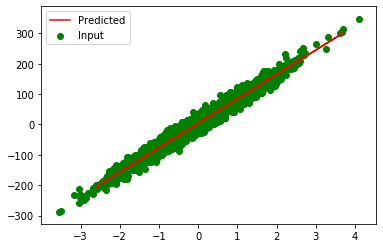

In [11]:
plt.plot(test, hypothesis(test,final_theta),color = 'Red',label='Predicted')
plt.scatter(x,y,color = 'green',label = 'Input')
plt.legend()
plt.show()